In [2]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf

In [3]:
def load_histories(folder):
    history1 = pickle.load(open(folder + "1.pkl", "rb"))
    history2 = pickle.load(open(folder + "2.pkl", "rb"))
    history3 = pickle.load(open(folder + "3.pkl", "rb"))
    
    total_history = dict()
    
    for key in history1.keys():
        current_values = []
        for hist_dict in [history1, history2, history3]:
            current_values += hist_dict[key]
        total_history[key] = current_values
    return total_history

# Training Loss

In [4]:
DATASETS = ["S1", "S1-Big", "S10", "S10-Big"]
MODELS = ["base_dropout", "base_no_dropout", "big_dropout", "big_no_dropout"]

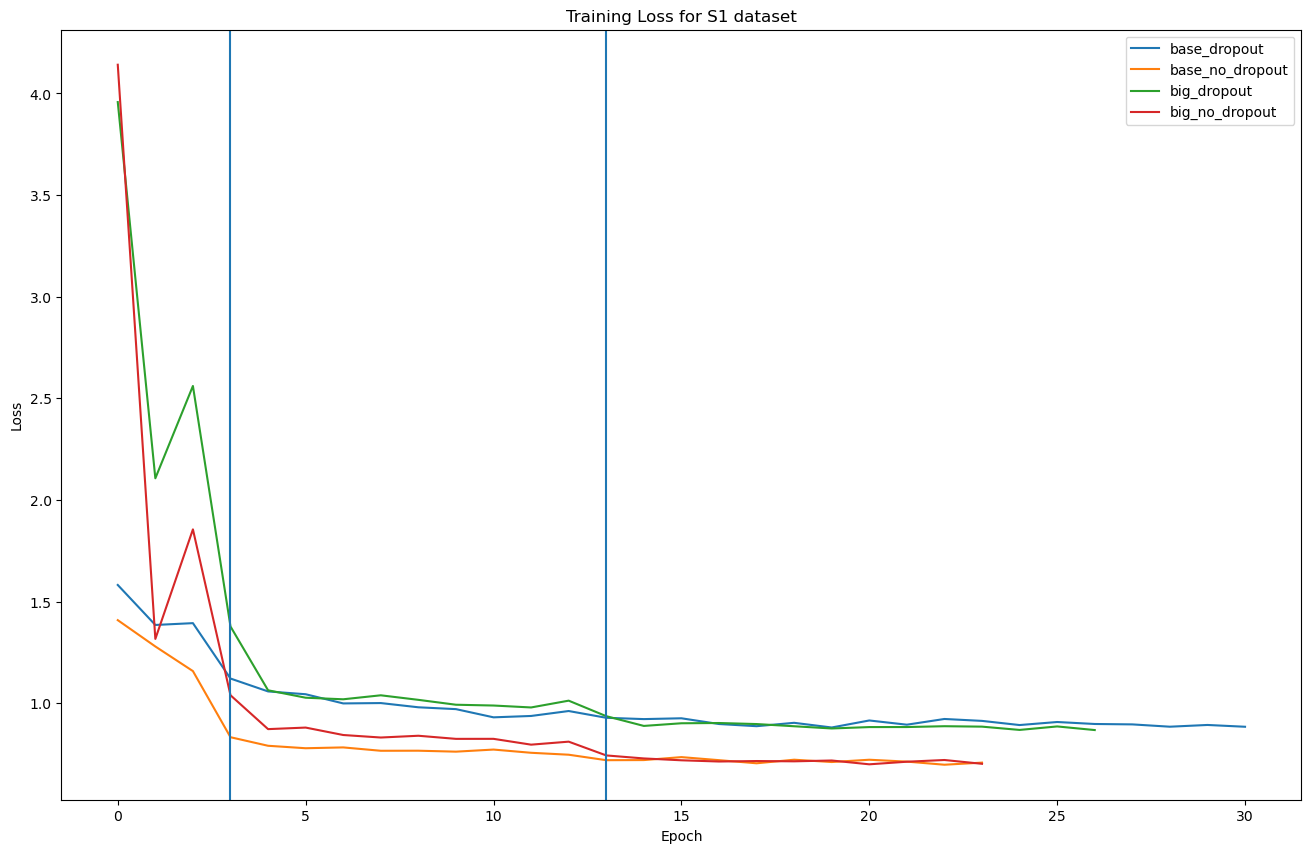

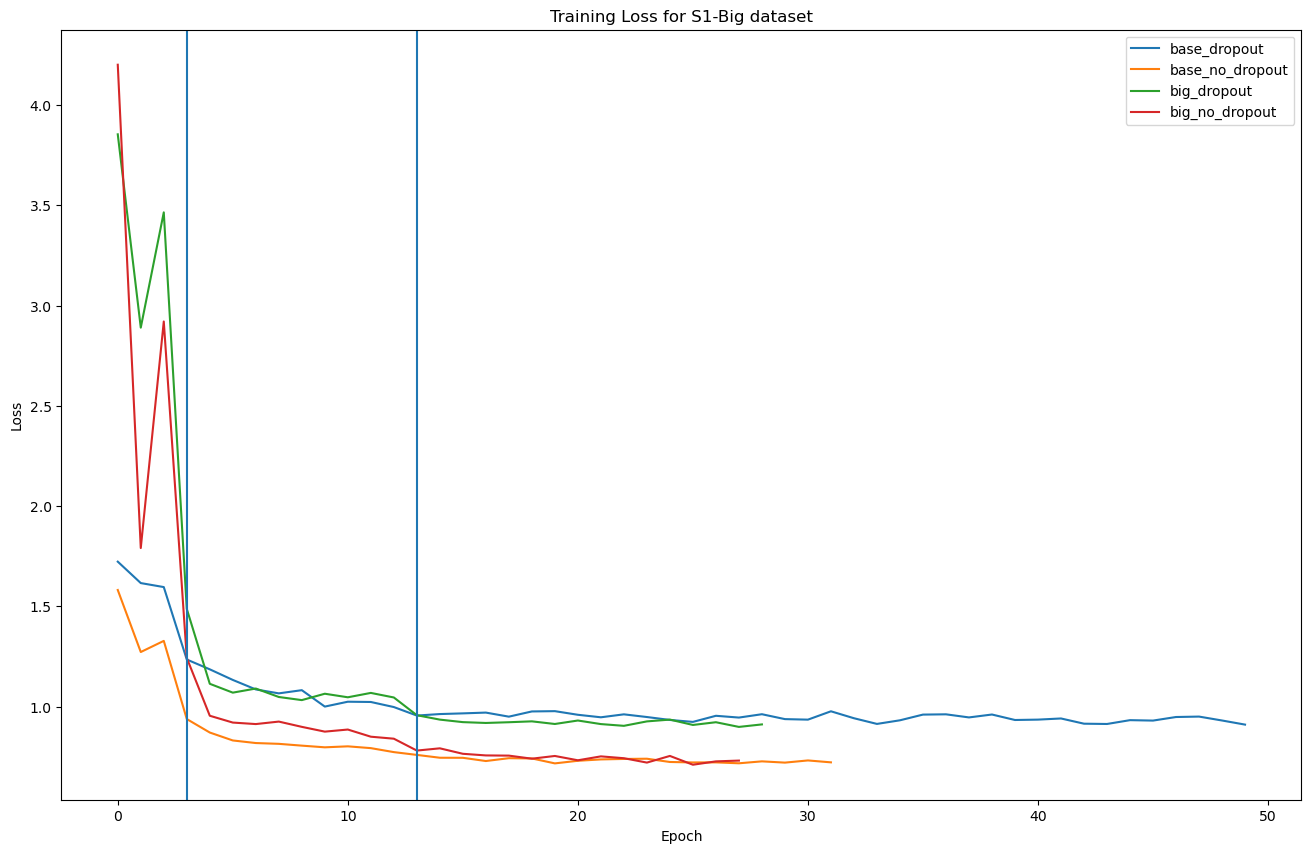

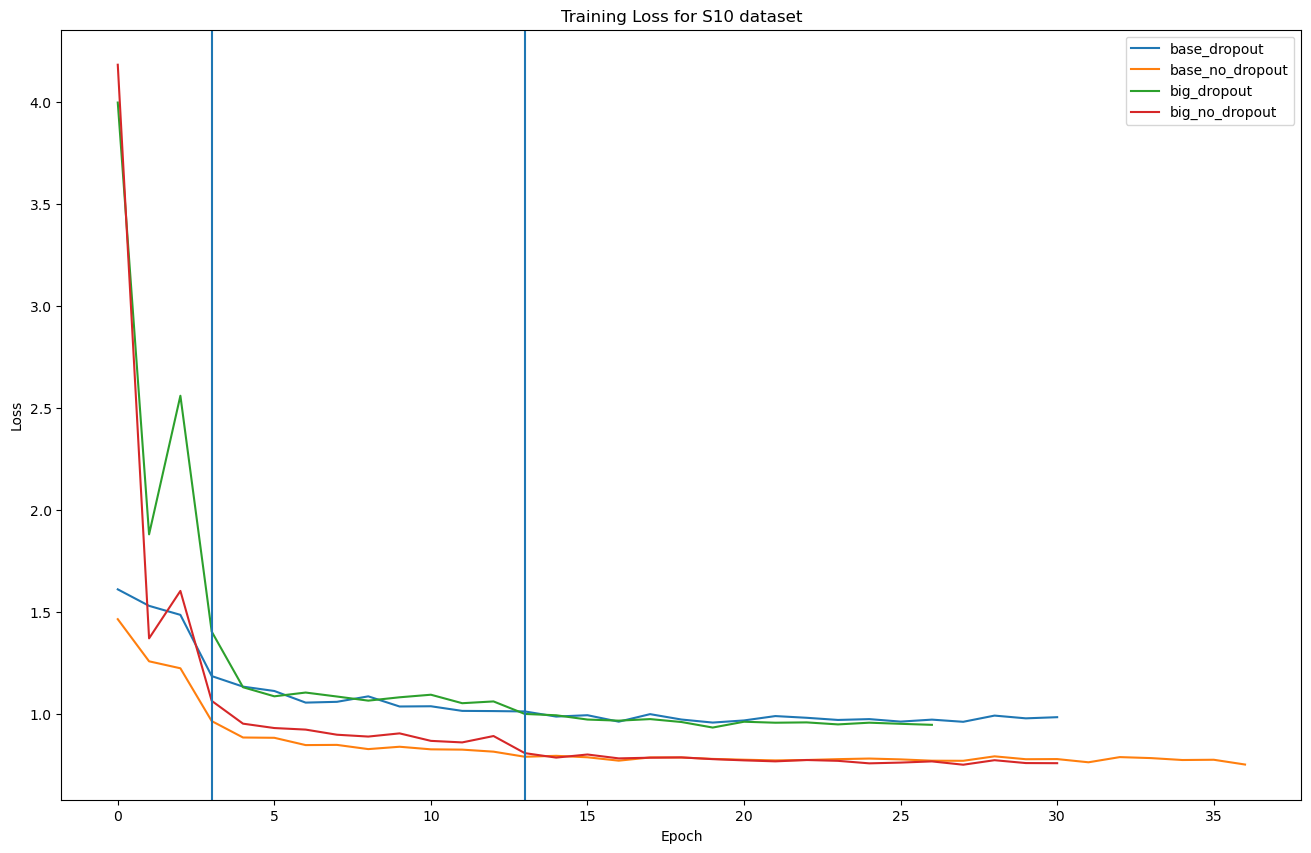

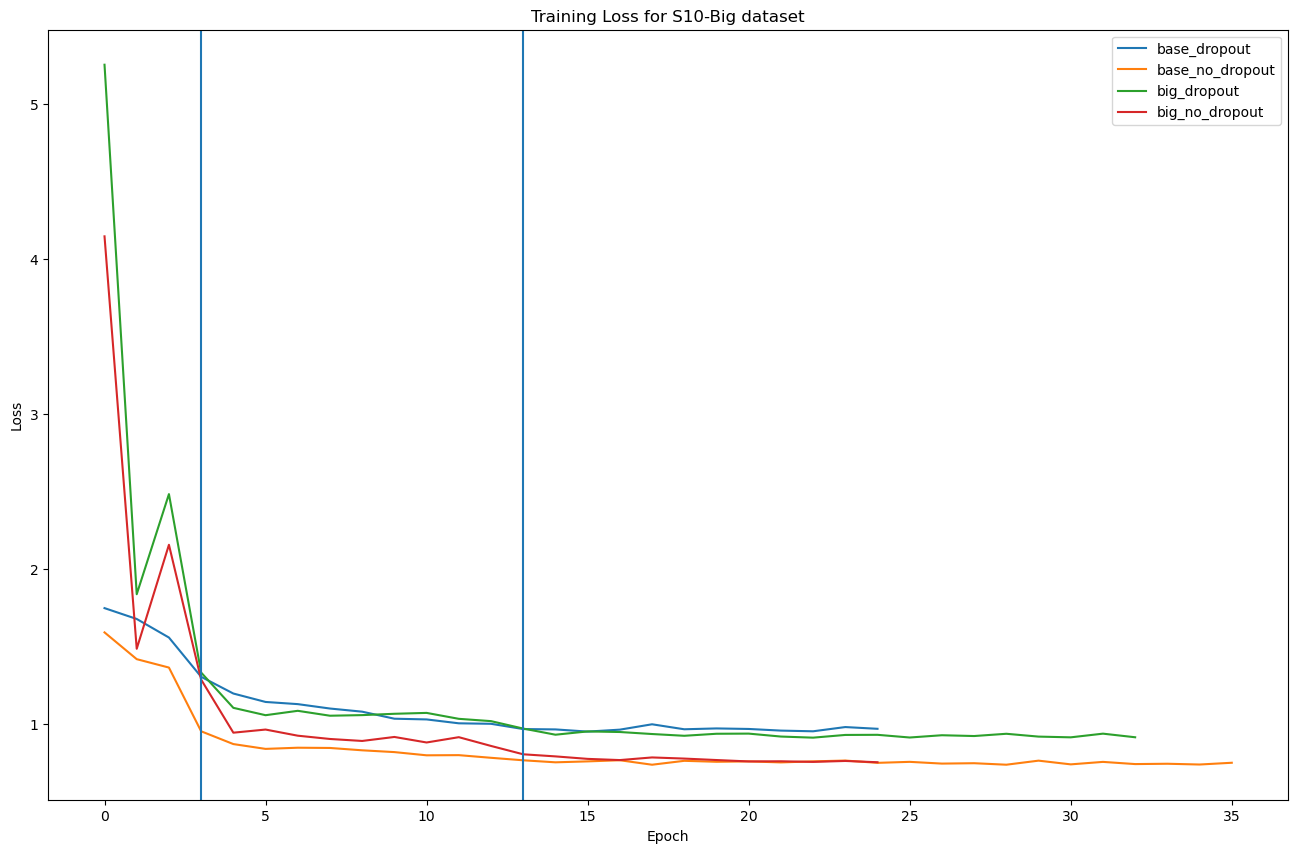

In [6]:
for dataset in DATASETS:    
    histories = []
    plt.figure(figsize=(16, 10))
    
    for model in MODELS:
        histories.append(load_histories("../models/histories/" + dataset + "/" + model + "/"))
    
    for i, history in enumerate(histories):
        plt.plot(history["loss"], label=MODELS[i])

    plt.axvline(3)
    plt.axvline(13)

    plt.title("Training Loss for " + dataset + " dataset")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

## Validation Loss

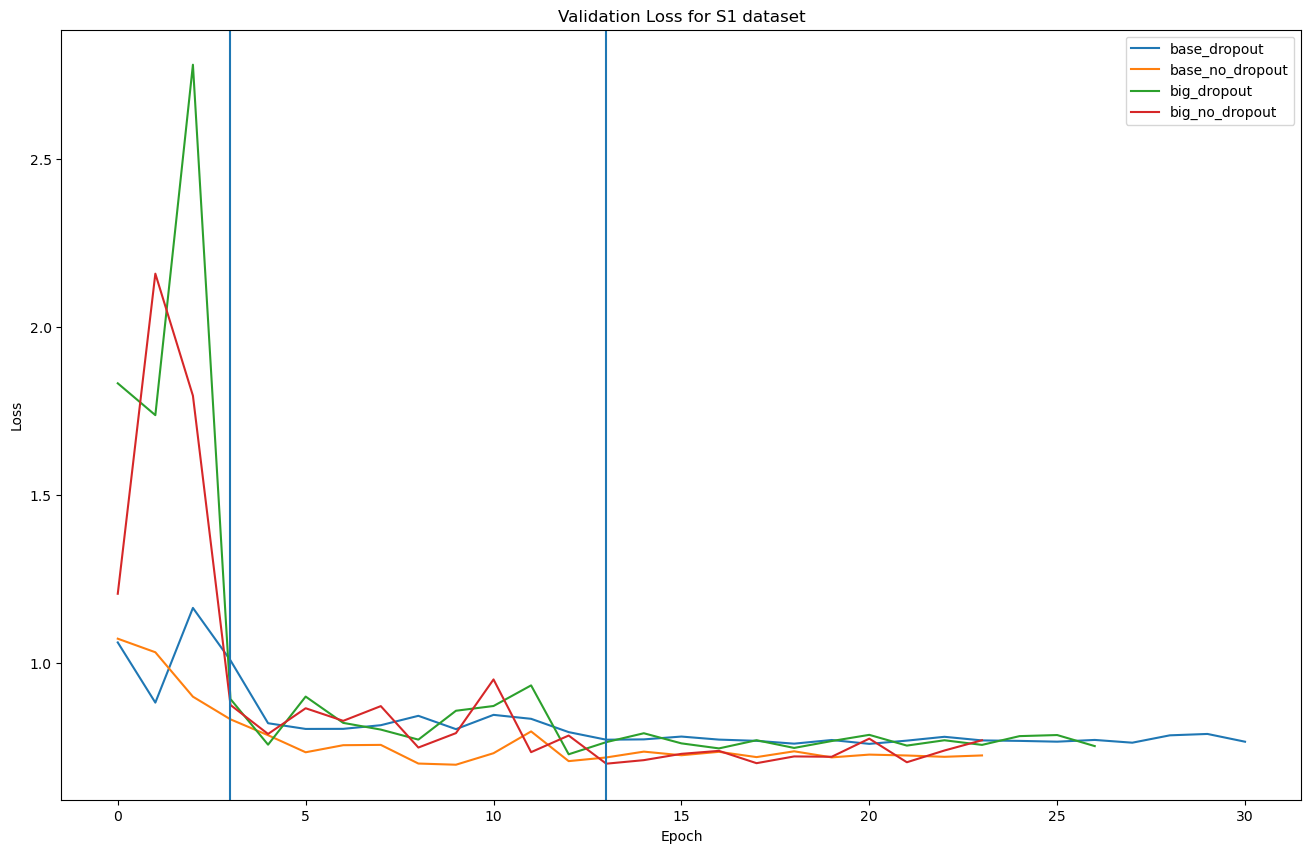

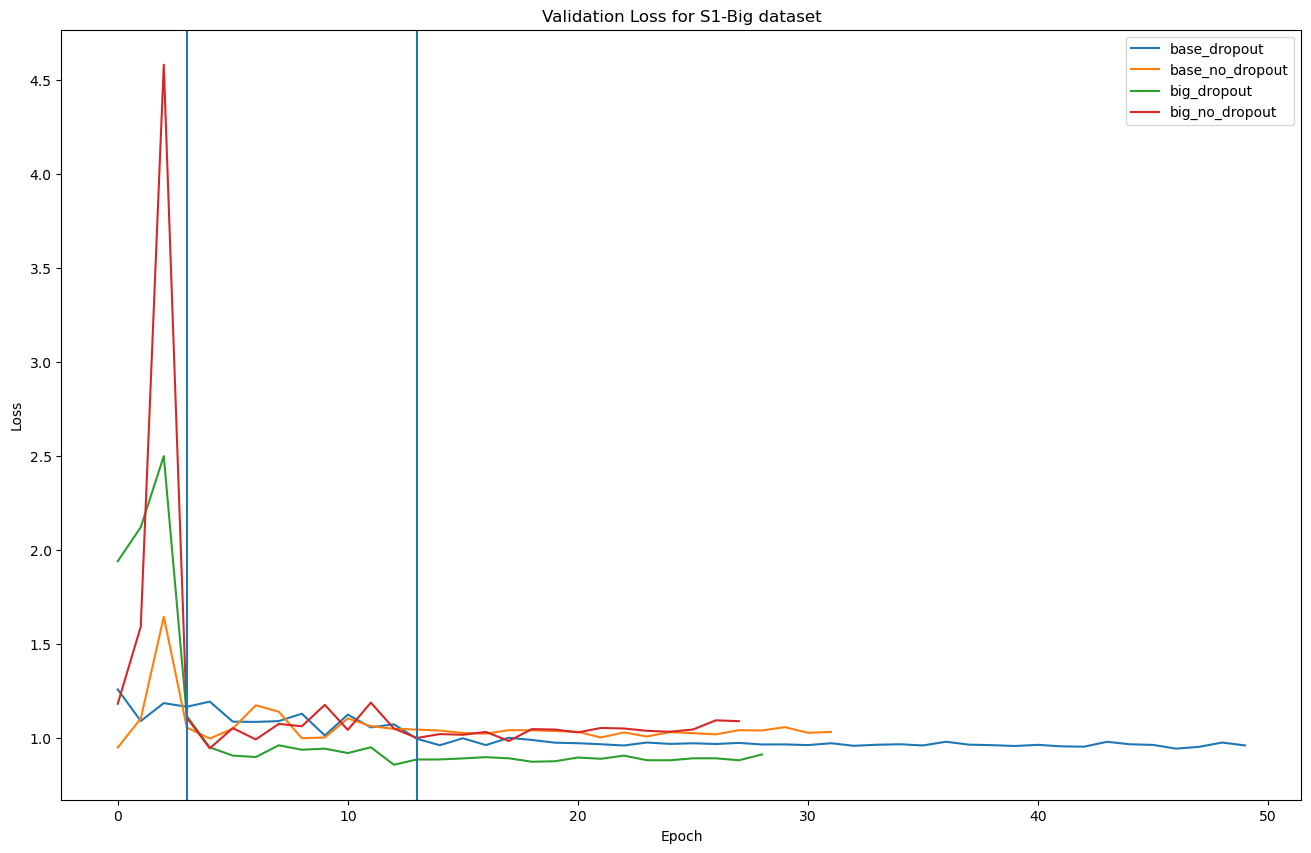

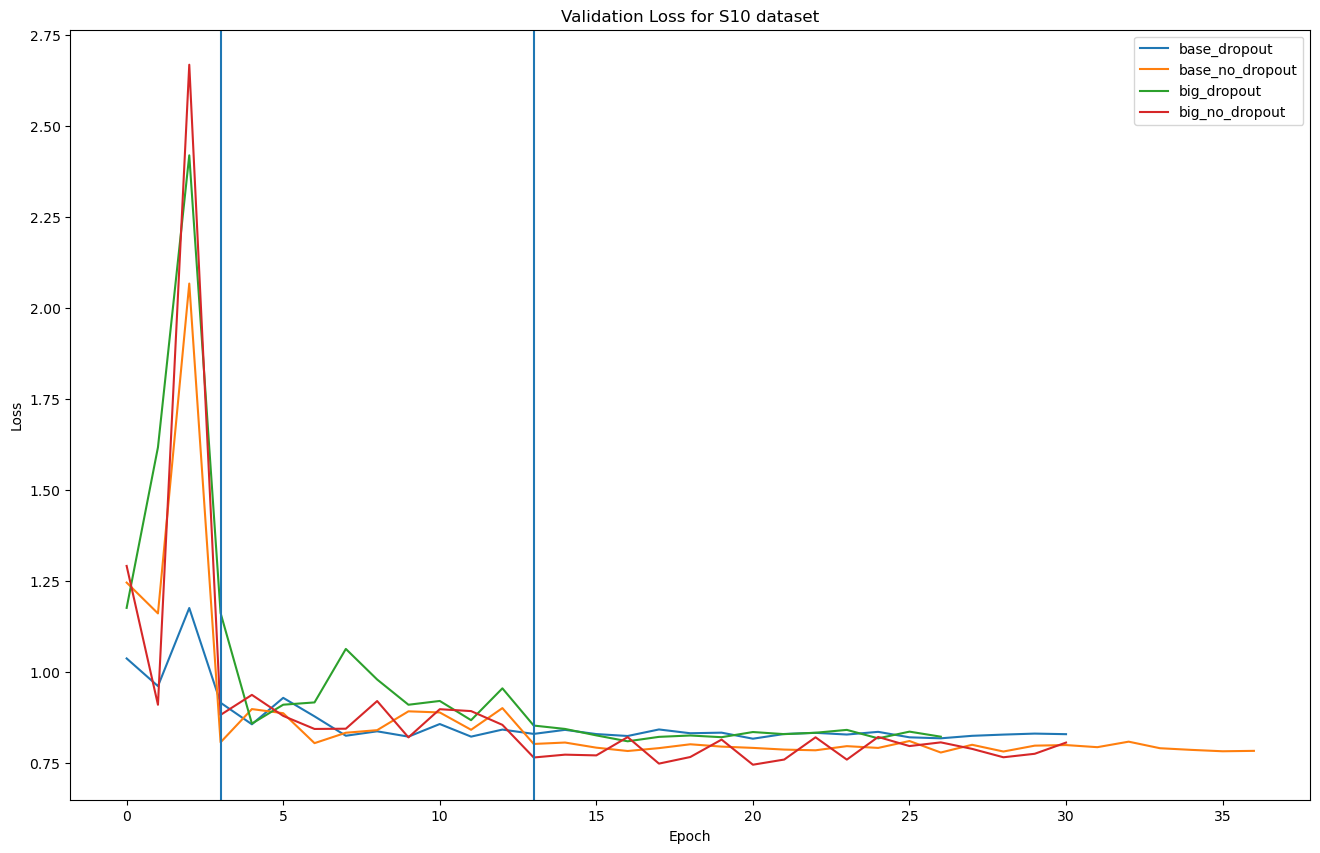

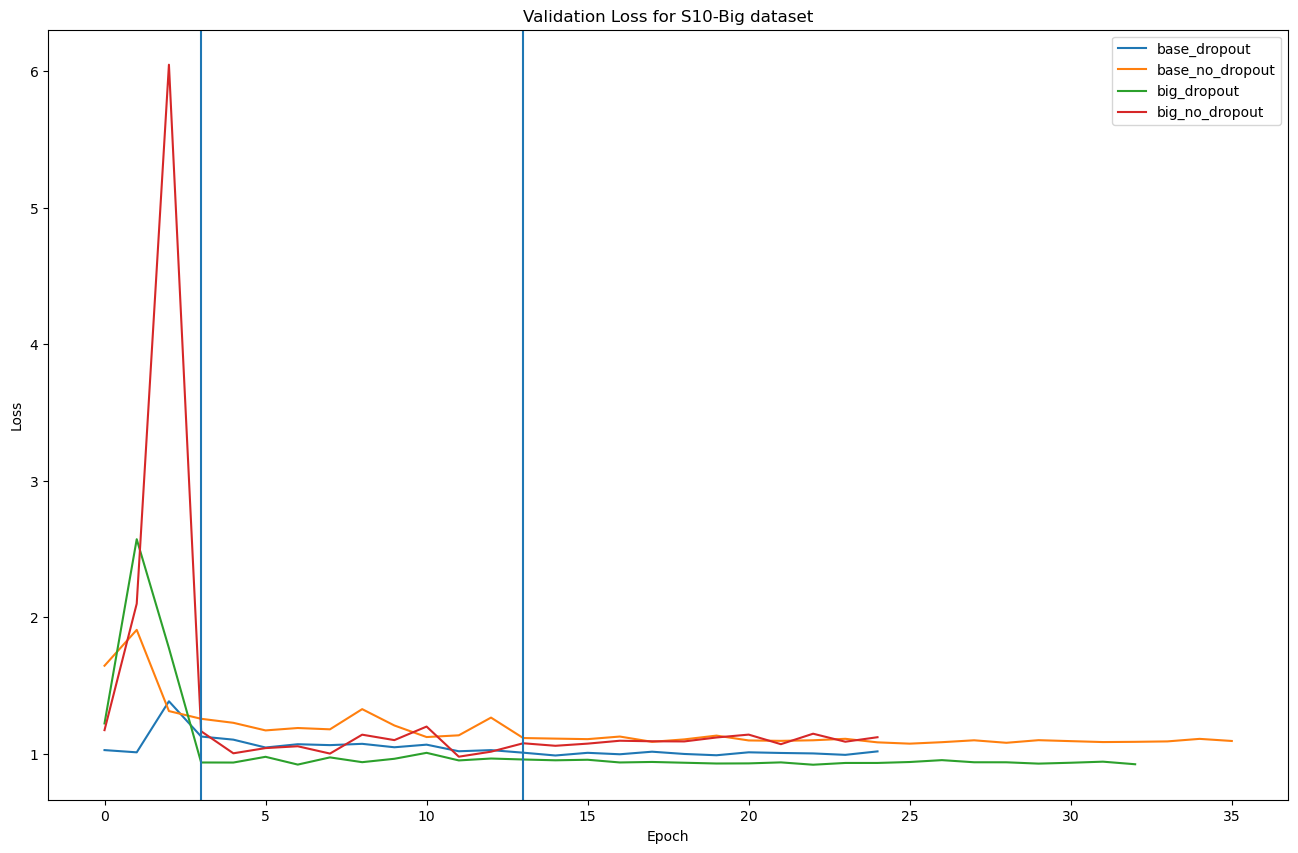

In [7]:
for dataset in DATASETS:    
    histories = []
    plt.figure(figsize=(16, 10))
    
    for model in MODELS:
        histories.append(load_histories("../models/histories/" + dataset + "/" + model + "/"))
    
    for i, history in enumerate(histories):
        plt.plot(history["val_loss"], label=MODELS[i])

    plt.axvline(3)
    plt.axvline(13)

    plt.title("Validation Loss for " + dataset + " dataset")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

# Accuracy

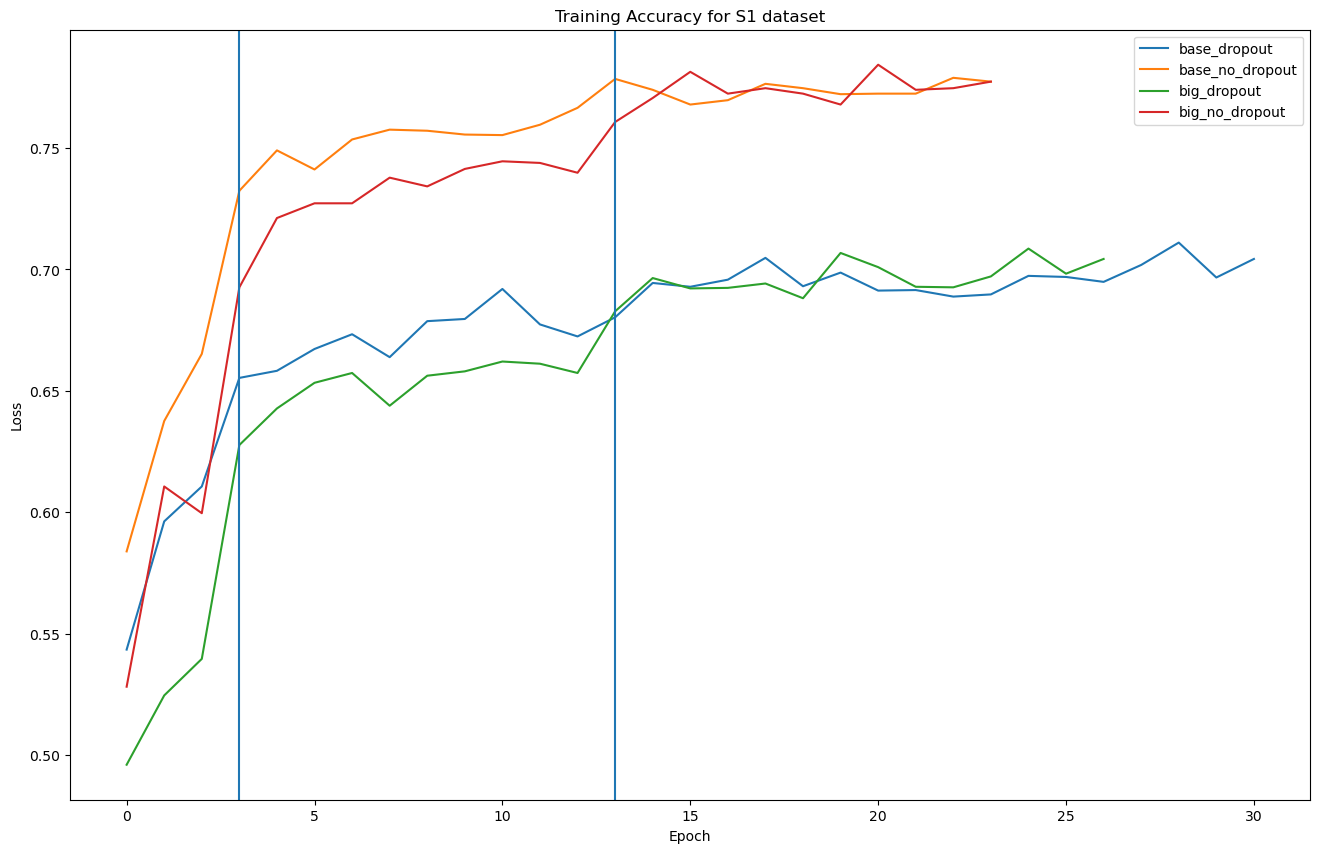

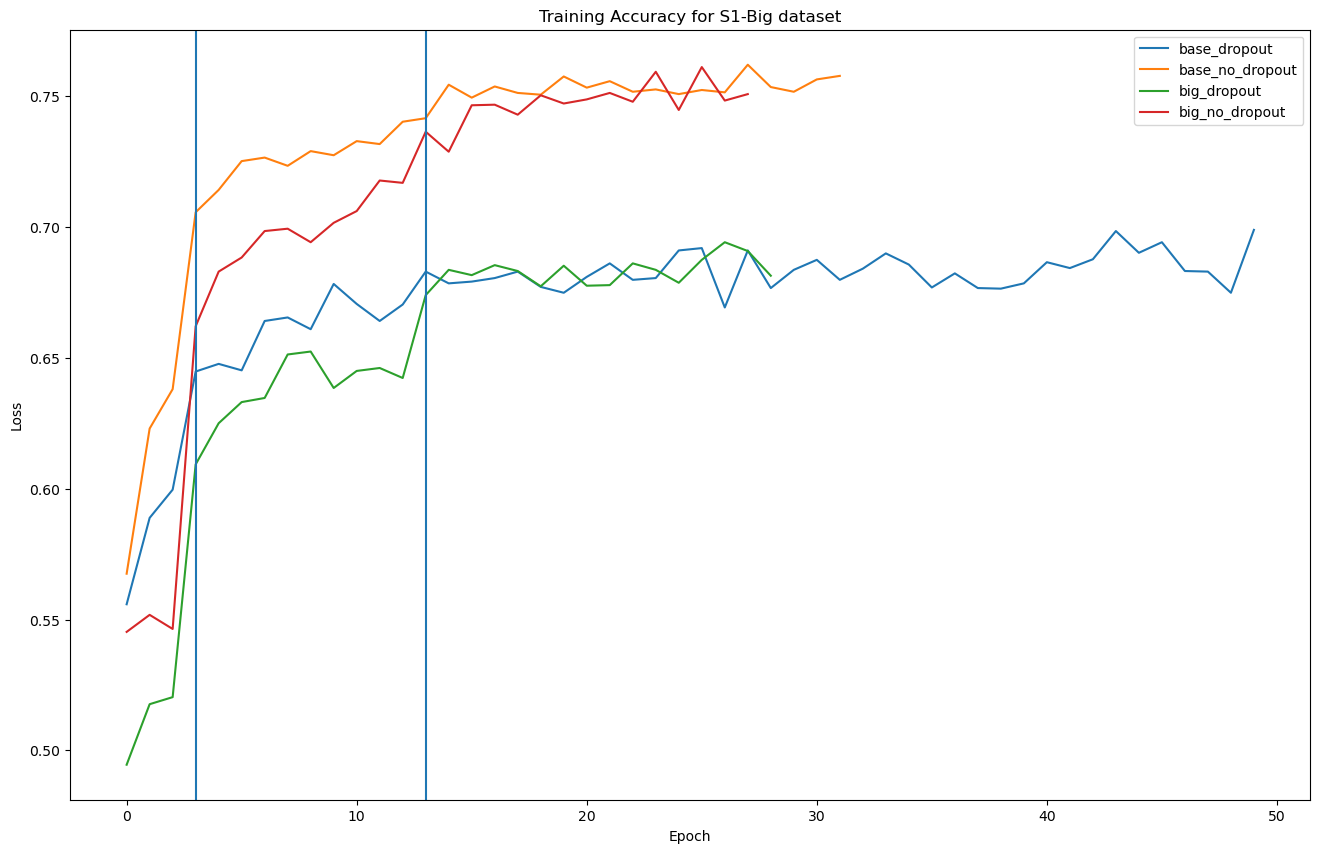

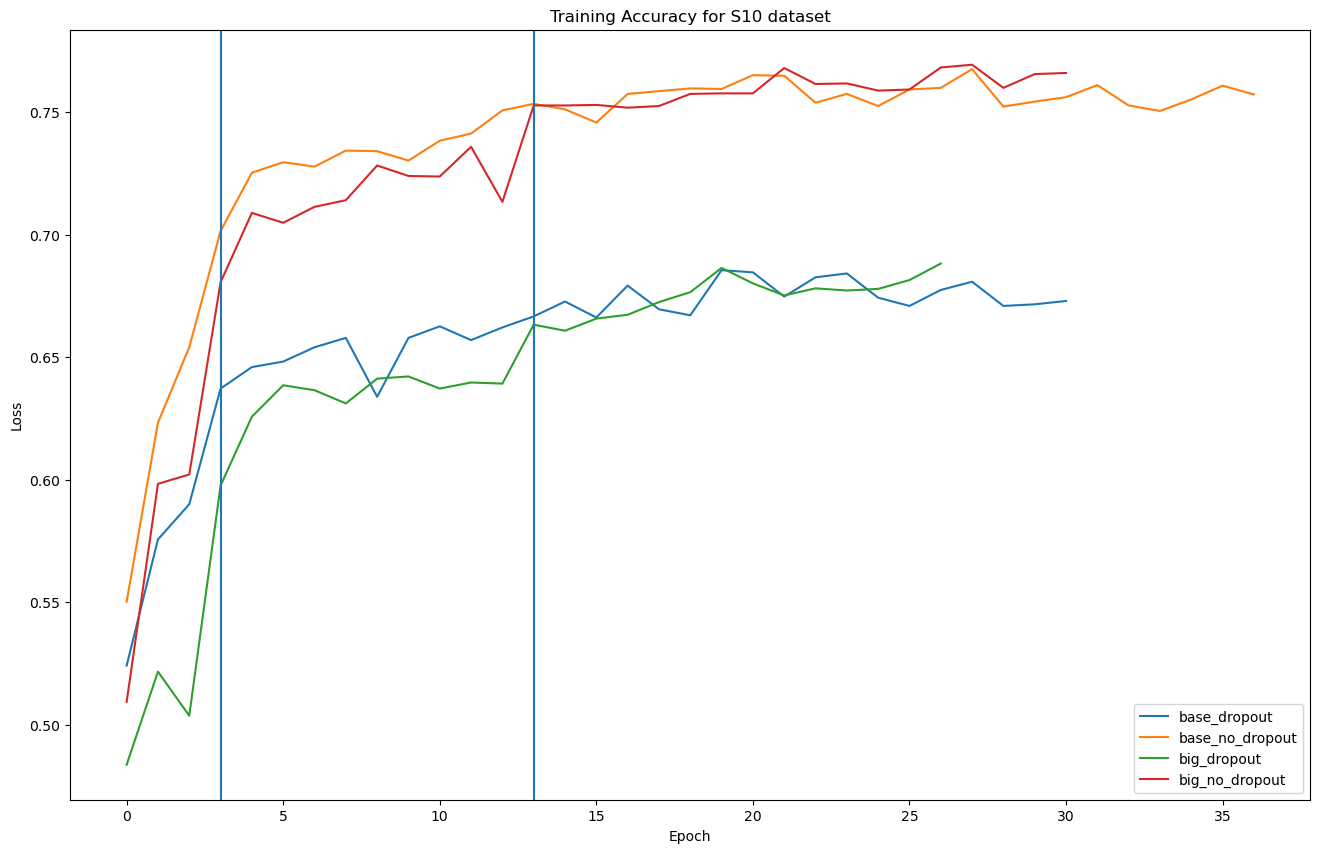

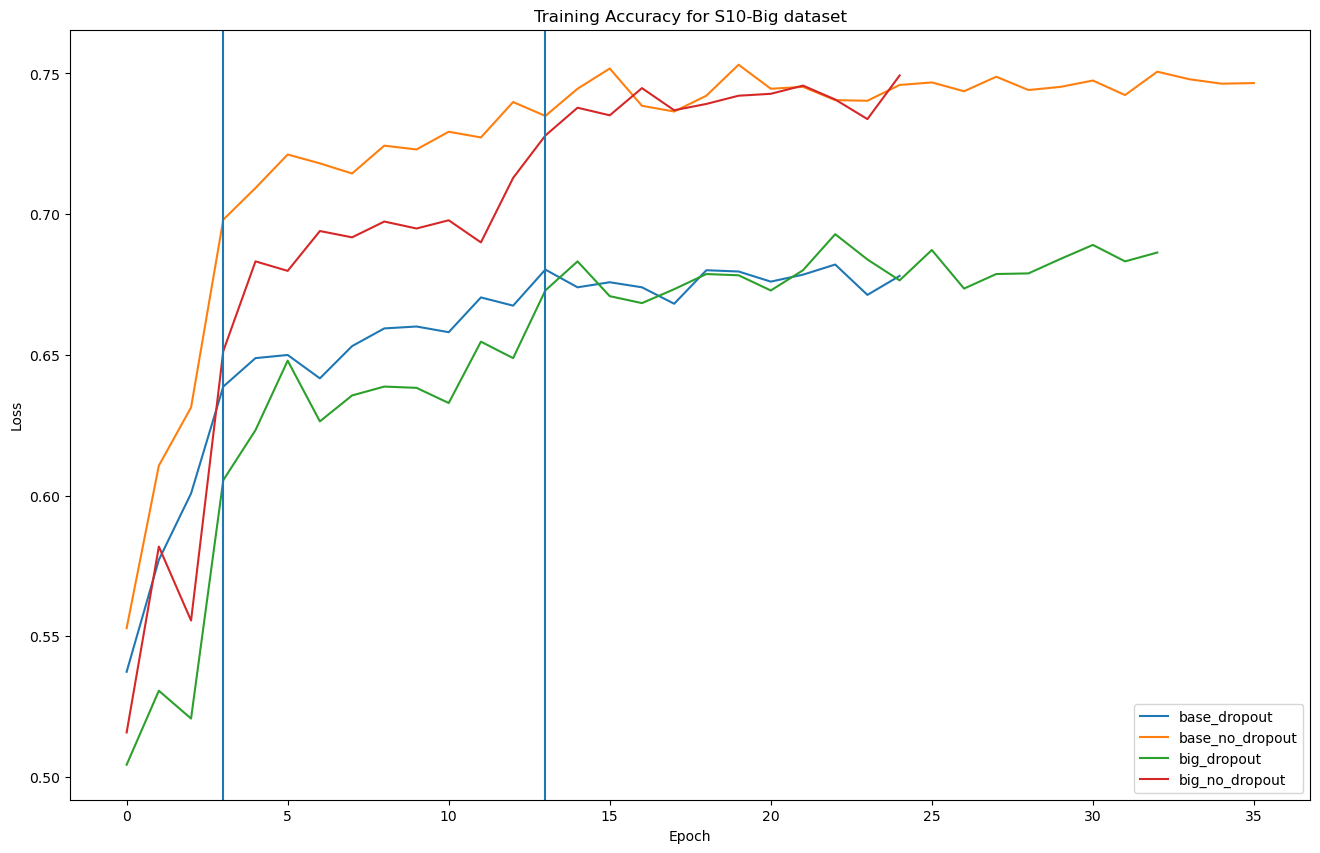

In [8]:
for dataset in DATASETS:    
    histories = []
    plt.figure(figsize=(16, 10))
    
    for model in MODELS:
        histories.append(load_histories("../models/histories/" + dataset + "/" + model + "/"))
    
    for i, history in enumerate(histories):
        plt.plot(history["accuracy"], label=MODELS[i])

    plt.axvline(3)
    plt.axvline(13)

    plt.title("Training Accuracy for " + dataset + " dataset")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

## Validation Accuracy

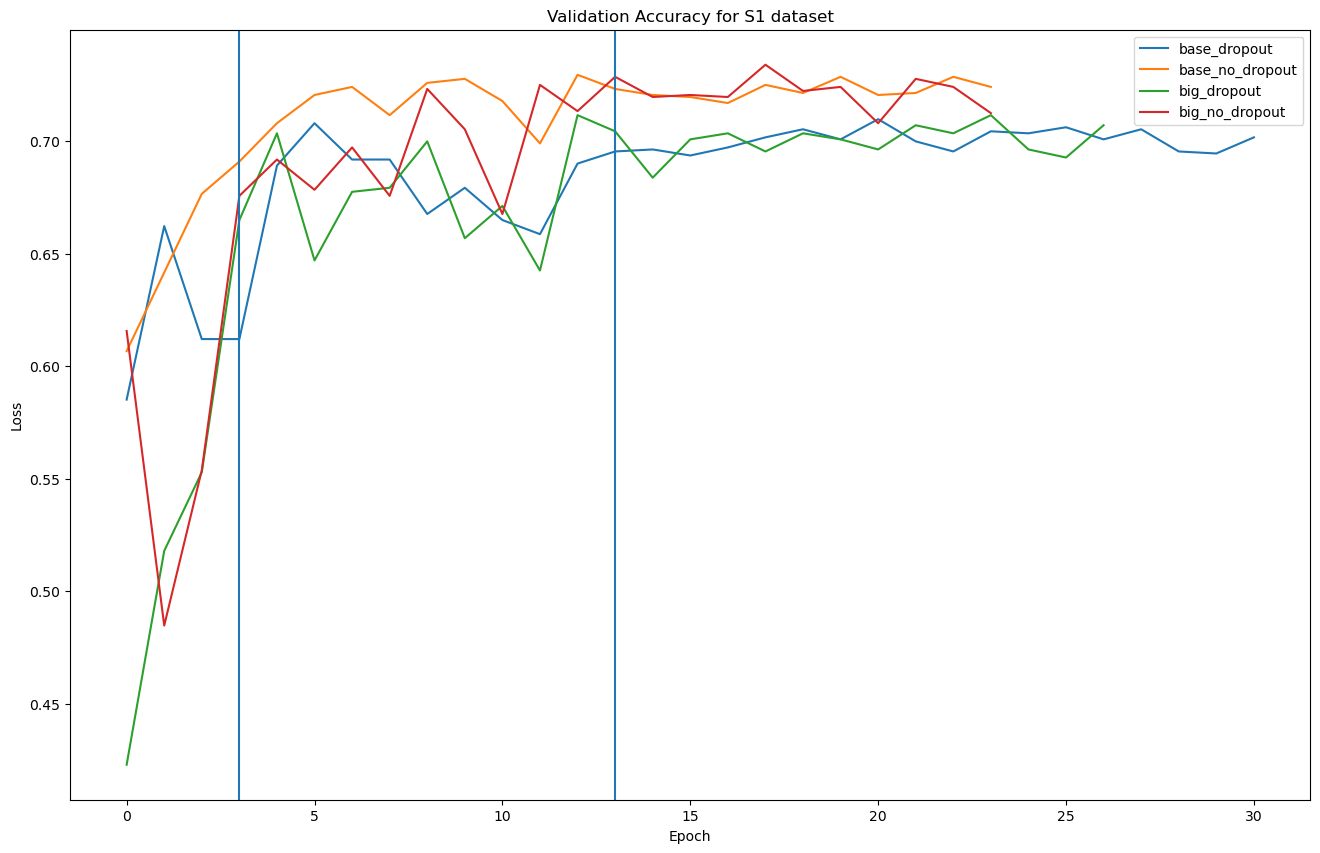

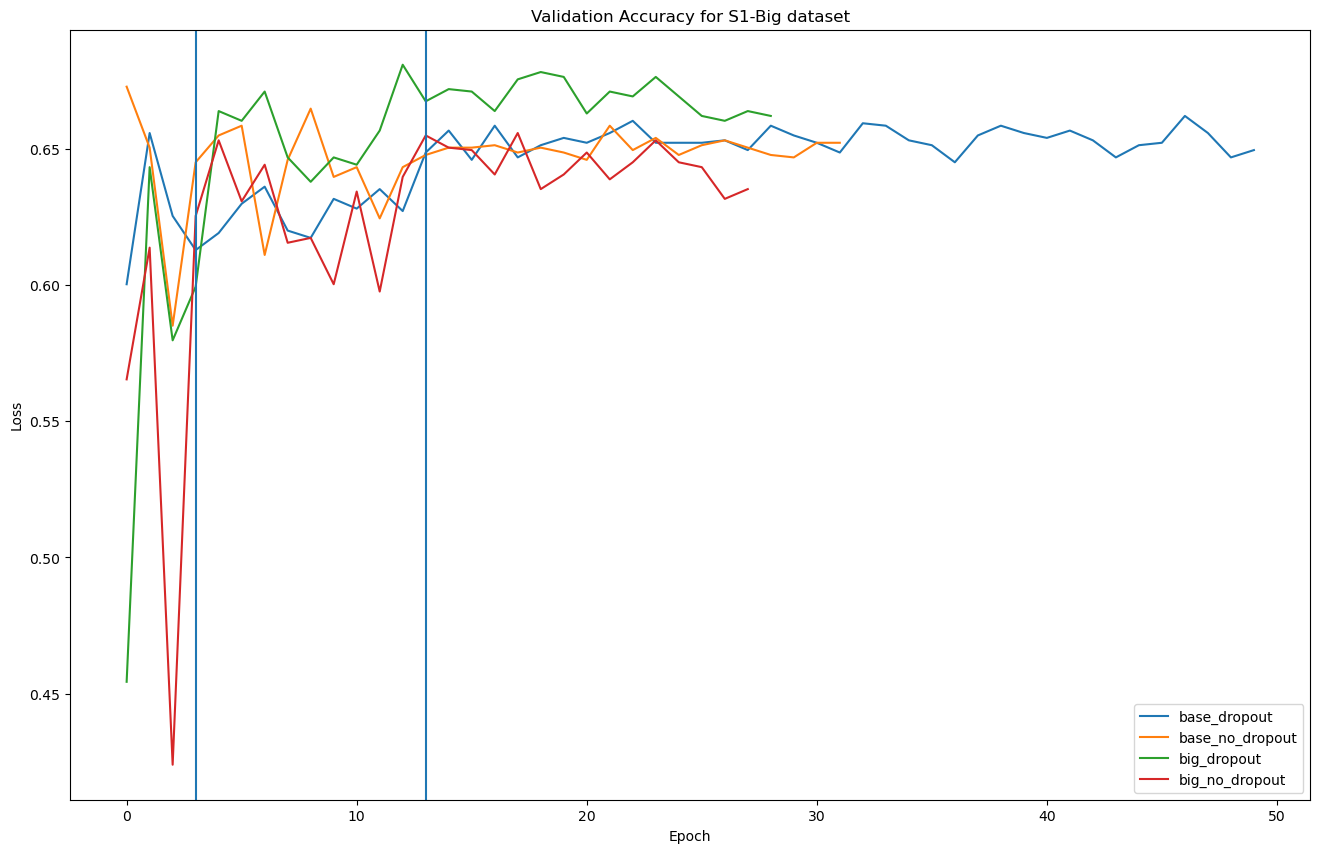

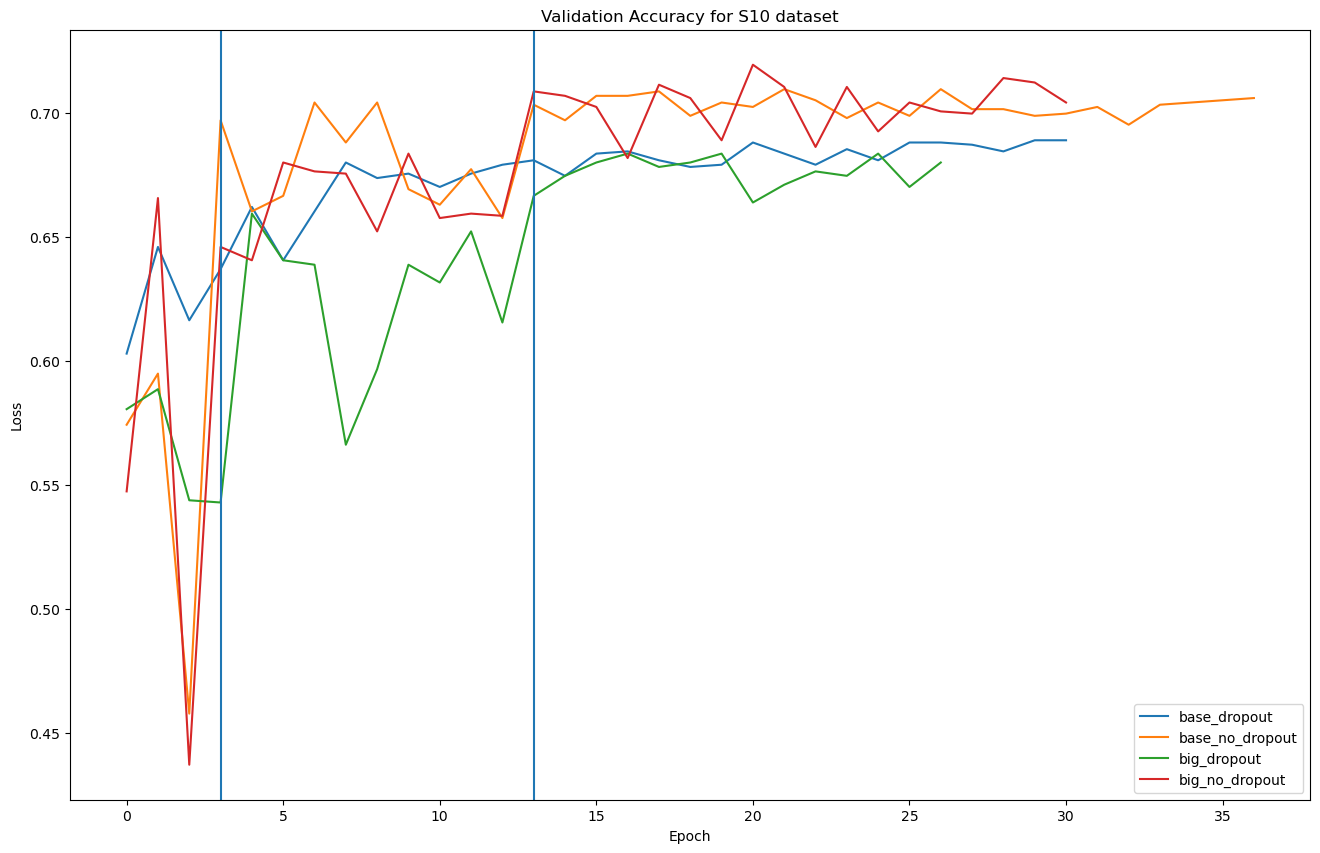

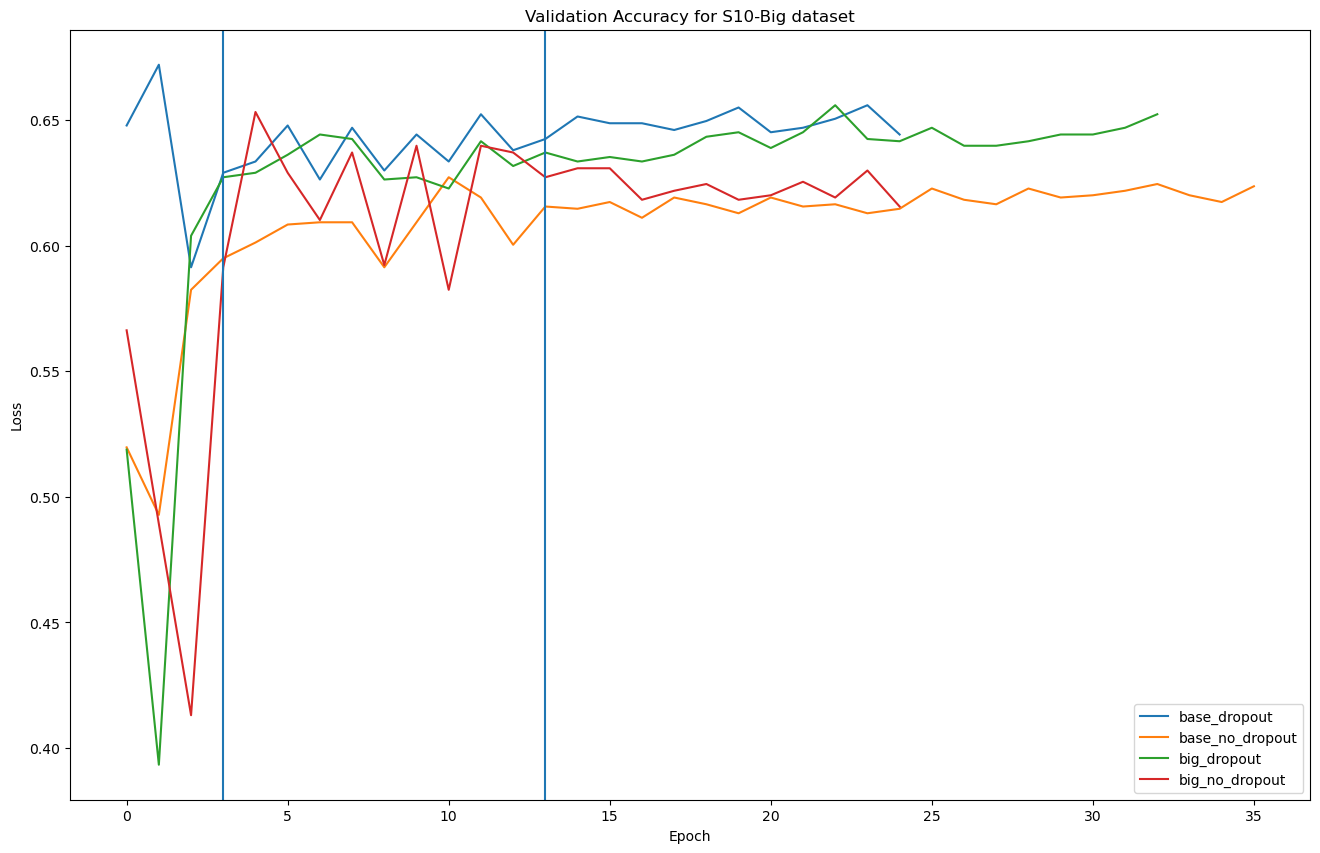

In [9]:
for dataset in DATASETS:    
    histories = []
    plt.figure(figsize=(16, 10))
    
    for model in MODELS:
        histories.append(load_histories("../models/histories/" + dataset + "/" + model + "/"))
    
    for i, history in enumerate(histories):
        plt.plot(history["val_accuracy"], label=MODELS[i])

    plt.axvline(3)
    plt.axvline(13)

    plt.title("Validation Accuracy for " + dataset + " dataset")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

# Testing

In [10]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

def load_dataset(dataset):
    test_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join("../Datasets/", dataset, "test/"),
        shuffle=True,
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        label_mode="categorical"
    )
    
    test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
    return test_dataset

def plot_confussion_matrix(preds, labels):
    # Get the predict label for each image and give 1d format for confusion matrix
    pred_labels = np.argmax(preds, axis=1)
    labels = np.argmax(labels, axis=1)

    # Plot confusion matrix
    titles_options = [
        ('Confusion Matrix, without normalization', None),
        ('Normalized Confusion Matrix', 'true')
    ]

    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_predictions(
            labels,
            pred_labels,
            #display_labels=test_generator.class_indices,
            cmap=plt.cm.Blues,
            normalize=normalize)
        disp.ax_.set_title(title)
        disp.figure_.set(figwidth=16, figheight=10)
        plt.show()

In [24]:
dataset = load_dataset("S10-Big")

Found 4451 files belonging to 5 classes.


70/70 [==============================] - 19s 265ms/step


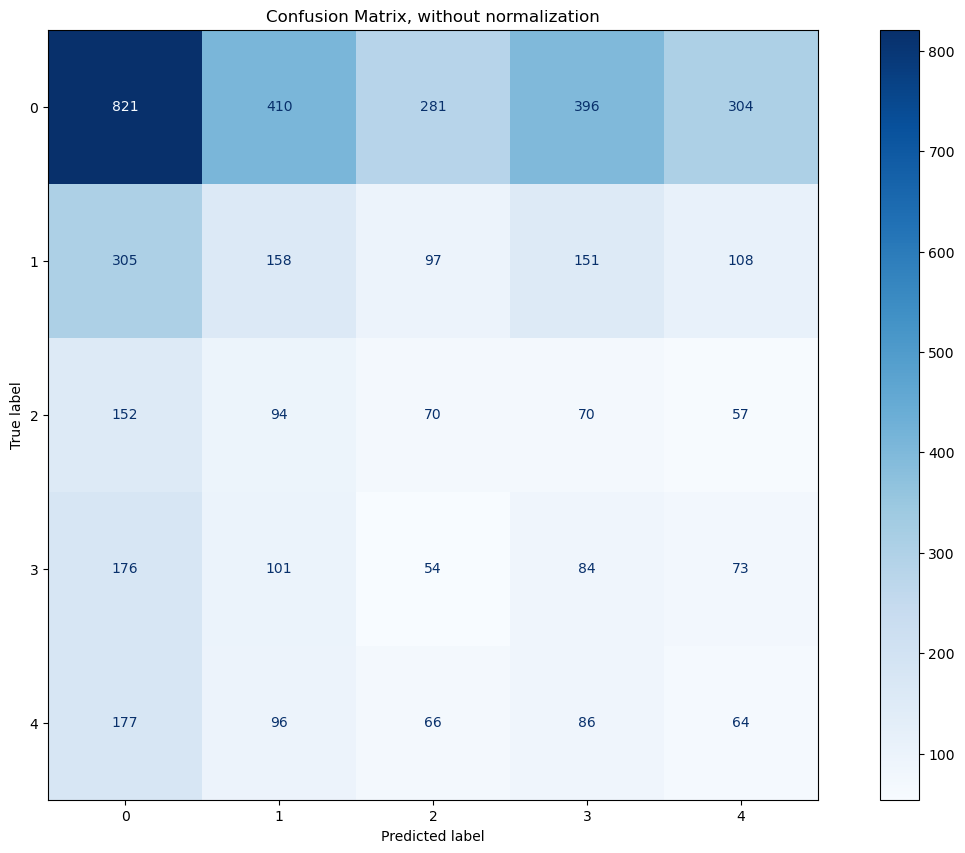

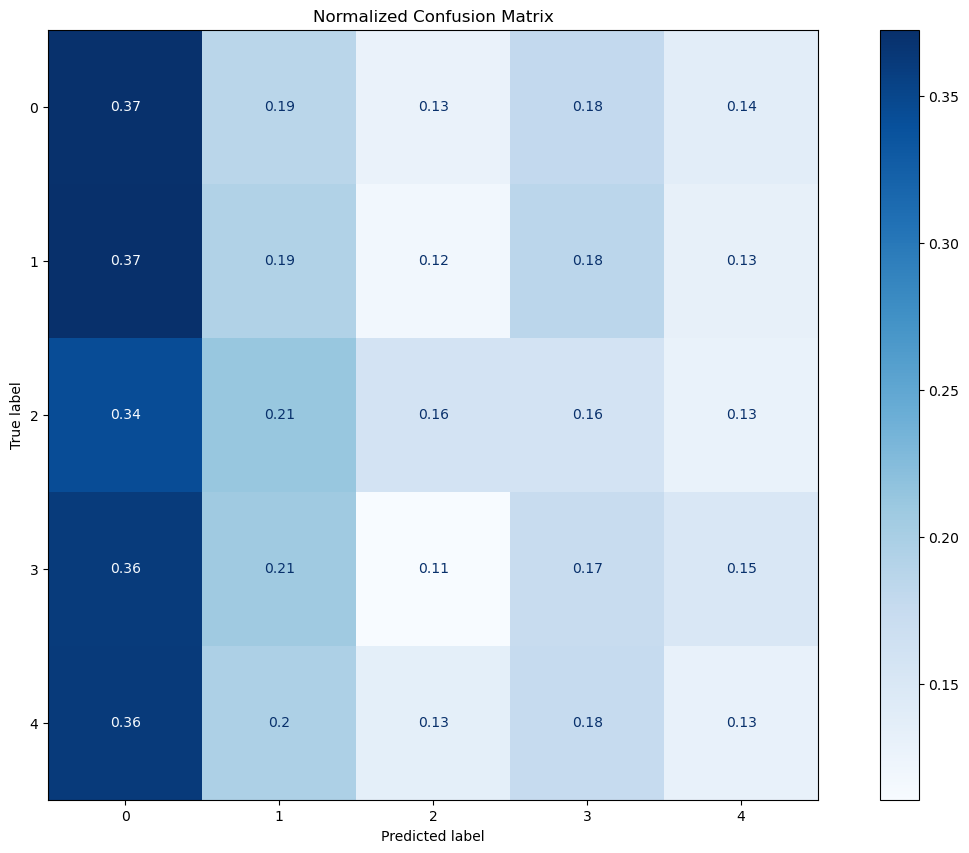

In [25]:
model = tf.keras.models.load_model("../models/weights/patches/big_dropout/S10-Big.h5")
model.evaluate(dataset)
preds = model.predict(dataset)
labels = np.concatenate([y for x, y in dataset], axis=0)
plot_confussion_matrix(preds, labels)